<a href="https://colab.research.google.com/github/dscastanedav/Alg2_dscastanedav/blob/main/ProyectoFinal/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distance & Time Seeking algorithm:


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing libraries & reading from a CSV file to generate the next graph:

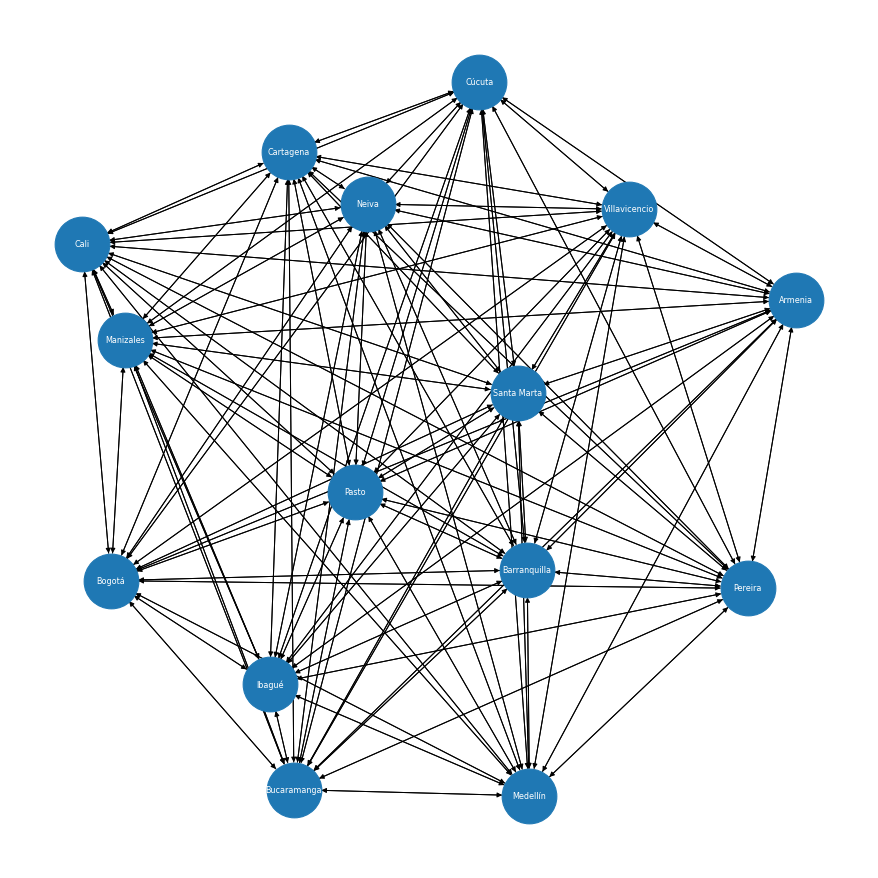

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import time
input_data = pd.read_csv('co.csv', index_col=0) #Reading the data      O(1)
G = nx.DiGraph(input_data)                                     #       O(1) 
plt.figure(3,figsize=(12,12)) #Setting up input data                   O(1)
nx.draw(G,                                                     #       O(1)
        with_labels     = True,  # labels on the node                  O(1)
        node_size       = 3000, # node size                            O(1)
        font_size       = 8, #font size                                O(1)
        font_color      = 'white', #Font color                         O(1)
        )                                                      #                | Time complexity calculation: 
plt.show()                                                     #       O(1)     | O(n)= O(1)+O(1)+O(1)+O(1)+O(1)+O(1)+O(1)+O(1)+O(1) = O(1) 


Importing libraries, reading the CSV's and generating the list necessary for Dijkstra's algorithm to recieve

In [ ]:
from numpy import genfromtxt #to read from a CSV file
import numpy as np #to generate the arrays

#Reading data from distance CSV
mydata = genfromtxt('co.csv', delimiter=',')                                     # O(1)
cityArray = mydata[1:,1:].tolist()                                               # O(1)

#Reading data from time CSV
timesquare = genfromtxt('time.csv', delimiter=',', dtype=str, comments=None)     # O(1)
timeArraylist = timesquare[1:,1:].tolist()                                       # O(1)

#Function that returns time in minutes
def timeConverter(time):                                                         # O(1)
      time = time.split(':')                                                     # O(1)
      minutes = int(time[0]) * 60 + int(time[1])                                 # O(1)
      return minutes                                                             # O(1)

#for that applies said function to the entire array
for i in range(len(timeArraylist)):                                              # O(n)
      for j in range(len(timeArraylist[i])):                                     # O(n)      
        timeArraylist[i][j] = timeConverter(timeArraylist[i][j])                 # O(1)
                                                                                 # |   Time complexity calculation:         
                                                                                 # | O(n)= O(1)+O(1)+O(1)+O(1)+O(1)+O(1)+O(1)O(1)+O(n)*(O(n)*O(1))= O(n^2)


Implementing Dijkstra's Algorithm:

In [ ]:
#Import and start the measuring of the execution time
import time
beginTime = time.time()

#defining the graph class
class Graph():

    #defines the graph
    def __init__(self, vertices, cities):                                        #O(1)
        self.V = vertices                                                        #O(1)
        self.cities = cities                                                     #O(1)
        self.graph = [[0 for column in range(vertices)]                          #O(N)
                      for row in range(vertices)]                                #O(N)
                                                                                 #Both For loops mean a total of O(N^2),
                                                                                 #O(1)+O(1)+O(1)+(O(N)*O(N)) = O(N^2) 
                                                                                 #Complexity for this instantiation is O(N^2)
 
    #Function that return the least time betweeen cities
    def printSolutiontime(self, dist, dest, path):                               #O(1)
        print("El menor tiempo es:")                                             #O(1)
        if dest in path:                                                         #O(1)
          print(self.cities[path[0]],"-> " , end = "")                           #O(1)
        else:                                                                    #O(1)
          for node in path:                                                      #O(N)
            print(self.cities[node],"-> " , end = "")                            #O(1)
          
        print(self.cities[dest], ":",  dist[dest],"m")                           #O(1)
                                                                                 #O(1)+O(1)+O(1)+O(1)+O(1)+(O(N)*O(1)) = O(N)
                                                                                 #The complexity for printSolutiontime function is O(N)


    #Function that return the least distance betweeen cities
    def printSolution(self, dist, dest, path):                                   #O(1)
        print("La menor distancia es:")                                          #O(1)
        if dest in path:                                                         #O(1)
          print(self.cities[path[0]],"-> " , end = "")                           #O(1)
        else:                                                                    #O(1)
          for node in path:                                                      #O(N)
            print(self.cities[node],"-> " , end = "")                            #O(1)
          
        print(self.cities[dest], ":",  dist[dest],"km")                          #O(1)
                                                                                 #O(1)+O(1)+O(1)+O(1)+O(1)+(O(N)*O(1)) = O(N)
                                                                                 #The complexity for printSolution function is O(N)

    #time goes here
    def calculateTime(func, *args):                                              #O(1)
      start = time.perf_counter()                                                #O(1)
      func(*args)                                                                #O(N)
      end = time.perf_counter()                                                  #O(1)
      #print(f'Tiempo de ejecución: {end - start:.8f} segundos')
                                                                                 #O(1)+O(1)+O(N)+O(1) = O(N)
                                                                                 #The complexity for calculateTime function is O(N)
 
    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minDistance(self, dist, sptSet):                                         #O(1)
 
        # Initialize minimum distance for next node
        min = 1e7                                                                #O(1)
 
        # Search not nearest vertex not in the
        # shortest path tree
        for v in range(self.V):                                                  #O(N)
            if dist[v] < min and sptSet[v] == False:                             #O(1)
                min = dist[v]                                                    #O(1)
                min_index = v                                                    #O(1)
        return min_index                                                         #O(1)
                                                                                 #(O(N)*(O(1)+O(1)+O(1)))+O(1) = O(N)
                                                                                 #The complexity for minDistance function is O(N)

    #dijkstra algorithm to search for time
    def dijkstratime(self, src, dest):                                           #O(1)
        # Creates an array with V spaces with 1e7 values
        dist = [1e7] * self.V                                                    #O(1)
        dist[src] = 0                                                            #O(1)
        # Creates an array with V spaces with False values
        sptSet = [False] * self.V                                                #O(1)

        path = []                                                                #O(1)

        for cout in range(self.V):                                               #O(N)
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = self.minDistance(dist, sptSet)                                   #O(N)
            
            # Put the minimum distance vertex in the
            # shortest path tree
            sptSet[u] = True                                                     #O(1)

            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(self.V):                                              #O(N)
                if (self.graph[u][v] > 0 and sptSet[v] == False and dist[v] > dist[u] + self.graph[u][v]): #O(1)
                   dist[v] = dist[u] + self.graph[u][v]                          #O(1)
                   if not u in path:                                             #O(1)
                     path.append(u)                                              #O(1)
 
        self.printSolutiontime(dist, dest, path)                                 #O(N)
                                                                                 #O(1)+O(1)+O(1)+O(1)+O(1)+(O(N)*(O(N)+O(1)+(O(N)*(O(1)+O(1)+O(1)+O(1))))+O(N)
                                                                                 #5(O(1))+(O(N)*(2(O(N))))+O(N) = O(N^2)
                                                                                 #The complexity for dijkstratime function is O(N^2)

    def dijkstra(self, src, dest):
        # Creates an array with V spaces with 1e7 values                         #O(1)
        dist = [1e7] * self.V                                                    #O(1)
        dist[src] = 0                                                            #O(1)
        # Creates an array with V spaces with False values
        sptSet = [False] * self.V                                                #O(1)

        path = []                                                                #O(1)

        for cout in range(self.V):                                               #O(N)
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = self.minDistance(dist, sptSet)                                   #O(N)
            
            # Put the minimum distance vertex in the
            # shortest path tree
            sptSet[u] = True                                                     #O(1)

            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(self.V):                                              #O(N)
                if (self.graph[u][v] > 0 and sptSet[v] == False and dist[v] > dist[u] + self.graph[u][v]): #O(1)
                   dist[v] = dist[u] + self.graph[u][v]                          #O(1)
                   if not u in path:                                             #O(1)
                     path.append(u)                                              #O(1)
 
        self.printSolution(dist, dest, path)                                     #O(N)
                                                                                 #O(1)+O(1)+O(1)+O(1)+O(1)+(O(N)*(O(N)+O(1)+(O(N)*(O(1)+O(1)+O(1)+O(1))))+O(N)
                                                                                 #5(O(1))+(O(N)*(2(O(N))))+O(N) = O(N^2)
                                                                                 #The complexity for dijkstra function is O(N^2)

  
my_cities = ["Bogotá","Cali","Medellín","Barranquilla","Cartagena","Cúcuta","Bucaramanga","Pereira","Santa Marta","Ibagué","Pasto","Manizales","Neiva","Villavicencio","Armenia"]
                                                                                 #O(1)


# Driver program
d = Graph(15, my_cities)                                                         #O(N^2) 
d.graph = cityArray                                                              #O(1)
t = Graph(15, my_cities)                                                         #O(N^2)
t.graph = timeArraylist                                                          #O(1)


d.dijkstra(14, 2)                                                                #O(N^2)
t.dijkstratime(14, 2)                                                            #O(N^2)

                                                                                 #Final complexity calculated by calling all the functions
                                                                                 #and instantiating the cities graph
                                                                                 #O(N^2)+O(1)+O(N^2)+O(1)+O(N^2)+O(N^2)
                                                                                 #2(O(1))+4(O(N^2)) = O(N^2)
                                                                                 #The complexity of our Dijkstra algorithm is O(N^2)

print("El tiempo de ejecucion de nuestro algoritmo es:")
endTime = time.time()
print(endTime-beginTime)

La menor distancia es:
Armenia -> Pereira -> Medellín : 279.0 km
El menor tiempo es:
Armenia -> Medellín : 229 m
El tiempo de ejecucion de nuestro algoritmo es:
0.009185791015625


Calculating the shortest distance using networkx

In [ ]:
import networkx as nx
import pandas as pd
import time
beginning = time.time() 

csv_info = pd.read_csv('co.csv',index_col=0)
cityMatrix = nx.from_pandas_adjacency(csv_info)

print("La menor distancia es con networkx es:")  
print(nx.dijkstra_path(cityMatrix, 'Armenia', 'Medellín'))

print("El tiempo de ejecucion con networkx es:")  
end = time.time()
print(end-beginning)

La menor distancia es con networkx es:
['Armenia', 'Pereira', 'Medellín']
El tiempo de ejecucion con networkx es:
0.013082027435302734
